In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime
import warnings
warnings.filterwarnings("ignore")

## Reading the CSV files

In [189]:
wages = pd.read_csv("Average_Weekly_Earnings_Quarterly.csv")
gdp = pd.read_csv("GDP_Quarterly.csv")
home_prices = pd.read_csv("Home_Price_Index.csv")
inflation = pd.read_csv("Inflation_Rates_Yearly.csv")
mortgages = pd.read_csv("Mortgage_Rates_Weekly.csv")
permits = pd.read_csv("Permits_Granted_Monthly.csv")
population = pd.read_csv("Population_Quarterly.csv")
unemployment = pd.read_csv("Unemployment_Quarterly.csv")

## Preparing the Data

In [190]:
home_prices['DATE'] = home_prices['DATE'].astype('datetime64[ns]')
home_prices['MONTH'] = home_prices['DATE'].dt.month
home_prices['DATE'] = home_prices['DATE'].dt.year
home_prices = home_prices.rename(columns={"DATE": "YEAR"})
home_prices = home_prices[home_prices.MONTH.isin([1, 4, 7, 10])]
home_prices.reset_index(drop=True, inplace=True)
home_prices.loc[home_prices['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
home_prices.loc[home_prices['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
home_prices.loc[home_prices['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
home_prices.loc[home_prices['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"
home_prices = home_prices.set_index(['YEAR', 'MONTH'])

In [191]:
wages = wages.rename(columns={"LES1252881600Q": "WAGES"})
wages['DATE'] = wages['DATE'].astype('datetime64[ns]')
wages['MONTH'] = wages['DATE'].dt.month
wages['DATE'] = wages['DATE'].dt.year
wages = wages.rename(columns={"DATE": "YEAR"})
wages.loc[wages['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
wages.loc[wages['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
wages.loc[wages['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
wages.loc[wages['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"
wages = wages.set_index(['YEAR', 'MONTH'])

In [192]:
gdp['DATE'] = gdp['DATE'].astype('datetime64[ns]')
gdp['MONTH'] = gdp['DATE'].dt.month
gdp['DATE'] = gdp['DATE'].dt.year
gdp = gdp.rename(columns={"DATE": "YEAR"})
gdp.loc[gdp['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
gdp.loc[gdp['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
gdp.loc[gdp['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
gdp.loc[gdp['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"
gdp = gdp.set_index(['YEAR', 'MONTH'])

In [193]:
mortgages['DATE'] = mortgages['DATE'].astype('datetime64[ns]')
mortgages = mortgages.rename(columns={"MORTGAGE30US": "MORTGAGE"})
mortgages['MONTH'] = mortgages['DATE'].dt.month
mortgages['DATE'] = mortgages['DATE'].dt.year
mortgages = mortgages.rename(columns={"DATE": "YEAR"})
mortgages = mortgages.groupby(['MONTH', 'YEAR'], as_index=False)['MORTGAGE'].mean().sort_values(by=['YEAR', 'MONTH'])
mortgages.loc[mortgages['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
mortgages.loc[mortgages['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
mortgages.loc[mortgages['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
mortgages.loc[mortgages['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"
mortgages = mortgages.groupby(['MONTH', 'YEAR'], as_index=False)['MORTGAGE'].mean().sort_values(by=['YEAR', 'MONTH'])
mortgages.reset_index(drop=True, inplace=True)
mortgages = mortgages.set_index(['YEAR', 'MONTH'])

In [194]:
permits['PERMIT(th)'] = permits['PERMIT(th)']*1000
permits = permits.rename(columns={"PERMIT(th)":"PERMITS"})
permits['DATE'] = permits['DATE'].astype('datetime64[ns]')
permits['MONTH'] = permits['DATE'].dt.month
permits['DATE'] = permits['DATE'].dt.year
permits = permits.rename(columns={"DATE": "YEAR"})
permits.loc[permits['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
permits.loc[permits['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
permits.loc[permits['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
permits.loc[permits['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"
permits = permits.groupby(['MONTH', 'YEAR'], as_index=False)['PERMITS'].sum().sort_values(by=['YEAR', "MONTH"])
permits.reset_index(drop=True, inplace=True)
permits = permits.set_index(['YEAR', 'MONTH'])

In [195]:
population = population.rename(columns={"B230RC0Q173SBEA": "POPULATION"})
population['POPULATION'] = population['POPULATION']*1000
population['DATE'] = population['DATE'].astype('datetime64[ns]')
population['MONTH'] = population['DATE'].dt.month
population['DATE'] = population['DATE'].dt.year
population.loc[population['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
population.loc[population['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
population.loc[population['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
population.loc[population['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"
population = population.rename(columns={"DATE": "YEAR"})
population = population.set_index(['YEAR', 'MONTH'])

In [196]:
unemployment['YEAR'] = unemployment['YEAR'].astype('datetime64[ns]')
unemployment['MONTH'] = unemployment['YEAR'].dt.month
unemployment['YEAR'] = unemployment['YEAR'].dt.year
unemployment.loc[unemployment['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
unemployment.loc[unemployment['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
unemployment.loc[unemployment['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
unemployment.loc[unemployment['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"
unemployment = unemployment.set_index(['YEAR', 'MONTH'])

In [197]:
inflation = inflation.rename(columns={"Inflation Rate (%)": "INF", "Year": "YEAR"})
inflation['INF'] = inflation['INF'].str[:-1]
inflation['INF'] = inflation['INF'].astype('float64')
inflation.sort_values(by=['YEAR'], ascending=True, inplace=True)
inflation = inflation.append([inflation]*3, ignore_index=True).sort_values(by=['YEAR'])
quarters = ["Q1", "Q2", "Q3", "Q4"]*(int(inflation.shape[0]/4))
inflation['MONTH'] = quarters
inflation = inflation.set_index(['YEAR', 'MONTH'])

## Combining the Data in one DataFrame

In [198]:
home_prices = home_prices.join([inflation, gdp, unemployment, permits, population, mortgages, wages])
home_prices.reset_index(['MONTH'], inplace=True)
home_prices.drop(['MONTH'], axis=1, inplace=True)

## From this data we will only be using the past 20 years information
### Thus, we will drop data from 1987 to 2001

In [199]:
home_prices.drop([i for i in range(1987, 2002)], inplace=True)
home_prices.reset_index(['YEAR'], inplace=True)

In [200]:
home_prices.head()

,YEAR,INDEX,INF,GDP,NROU,PERMITS,POPULATION,MORTGAGE,WAGES
0,2002,117.143,1.59,10783.500,5.140615,5143000.0,286935000.0,6.968000,341.0
1,2002,119.611,1.59,10887.460,5.129905,5143000.0,287574000.0,6.813667,339.0
2,2002,122.886,1.59,10984.040,5.119209,5236000.0,288303000.0,6.289167,337.0
3,2002,125.733,1.59,11061.433,5.108562,5466000.0,289007000.0,6.076000,336.0
4,2003,128.460,2.27,11174.129,5.097990,5419000.0,289609000.0,5.834500,335.0


In [201]:
home_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        79 non-null     int64  
 1   INDEX       79 non-null     float64
 2   INF         76 non-null     float64
 3   GDP         78 non-null     float64
 4   NROU        79 non-null     float64
 5   PERMITS     79 non-null     float64
 6   POPULATION  78 non-null     float64
 7   MORTGAGE    79 non-null     float64
 8   WAGES       77 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 5.7 KB


### Visualizing the relationship of the features with the target variable.

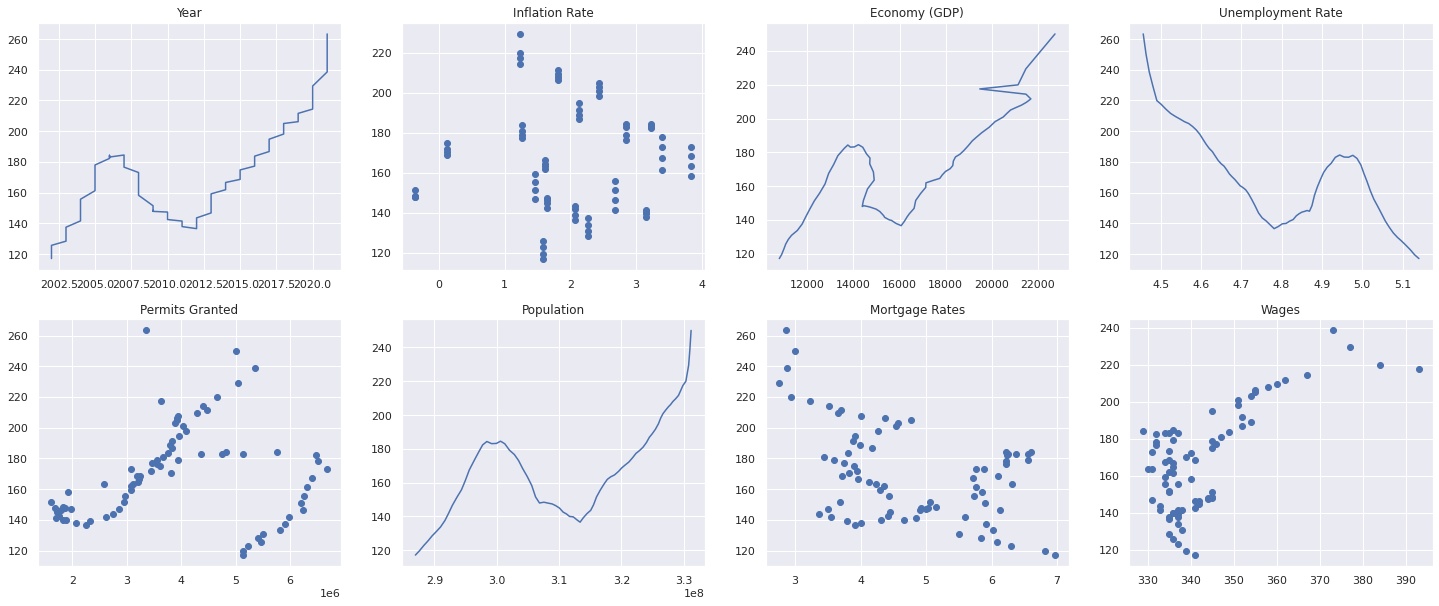

In [202]:
figure, axis = plt.subplots(2, 4, figsize=(25,10))

axis[0, 0].plot(home_prices['YEAR'], home_prices['INDEX'])
axis[0, 0].set_title("Year")

axis[0, 1].scatter(home_prices['INF'], home_prices['INDEX'])
axis[0, 1].set_title("Inflation Rate")

axis[0, 2].plot(home_prices['GDP'], home_prices['INDEX'])
axis[0, 2].set_title("Economy (GDP)")

axis[0, 3].plot(home_prices['NROU'], home_prices['INDEX'])
axis[0, 3].set_title("Unemployment Rate")

axis[1, 0].scatter(home_prices['PERMITS'], home_prices['INDEX'])
axis[1, 0].set_title("Permits Granted")

axis[1, 1].plot(home_prices['POPULATION'], home_prices['INDEX'])
axis[1, 1].set_title("Population")

axis[1, 2].scatter(home_prices['MORTGAGE'], home_prices['INDEX'])
axis[1, 2].set_title("Mortgage Rates")

axis[1, 3].scatter(home_prices['WAGES'], home_prices['INDEX'])
axis[1, 3].set_title("Wages")

plt.show()

### Visualizing the distribution of data within the features.

Text(0.5, 1.0, 'Wages')

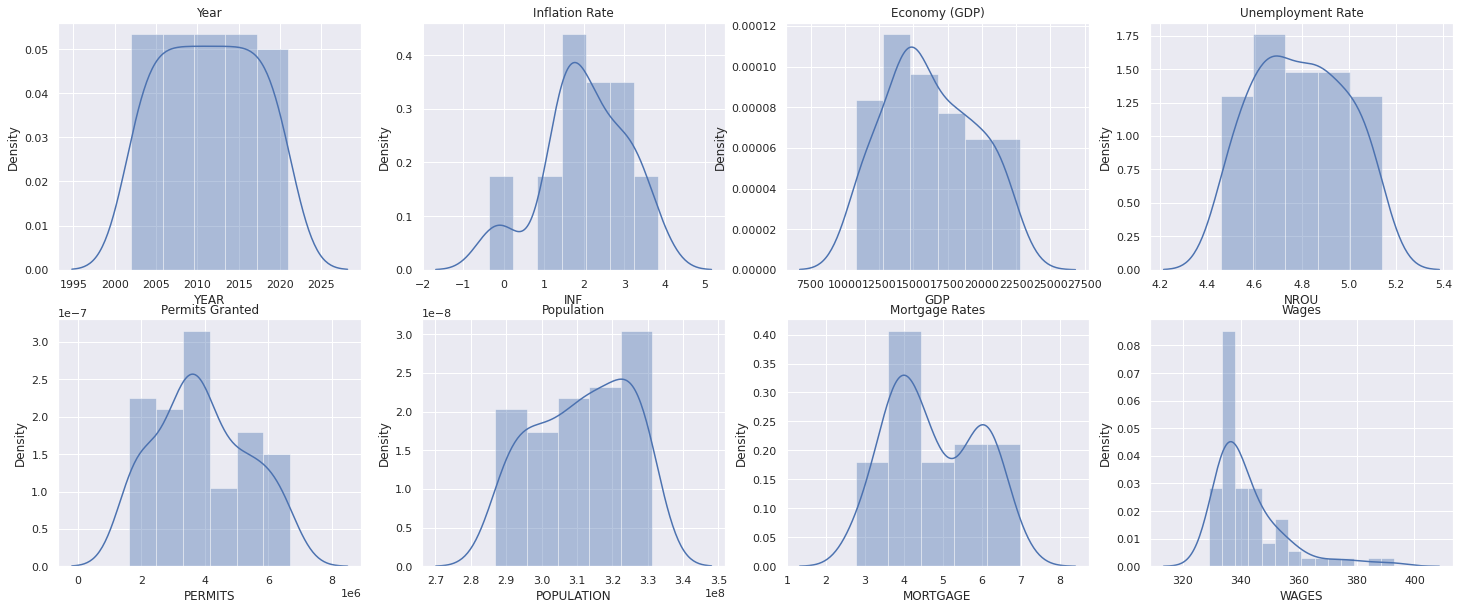

In [203]:
figure, axis = plt.subplots(2, 4, figsize=(25,10))

sns.distplot(home_prices['YEAR'], ax=axis[0, 0])
axis[0, 0].set_title("Year")

sns.distplot(home_prices['INF'], ax=axis[0, 1])
axis[0, 1].set_title("Inflation Rate")

sns.distplot(home_prices['GDP'], ax=axis[0, 2])
axis[0, 2].set_title("Economy (GDP)")

sns.distplot(home_prices['NROU'], ax=axis[0, 3])
axis[0, 3].set_title("Unemployment Rate")

sns.distplot(home_prices['PERMITS'], ax=axis[1, 0])
axis[1, 0].set_title("Permits Granted")

sns.distplot(home_prices['POPULATION'], ax=axis[1, 1])
axis[1, 1].set_title("Population")

sns.distplot(home_prices['MORTGAGE'], ax=axis[1, 2])
axis[1, 2].set_title("Mortgage Rates")

sns.distplot(home_prices['WAGES'], ax=axis[1, 3])
axis[1, 3].set_title("Wages")

### Exploring the correlations between the features and the summary of the features.

In [204]:
home_prices.corr()

,YEAR,INDEX,INF,GDP,NROU,PERMITS,POPULATION,MORTGAGE,WAGES
YEAR,1.000000,0.739827,-0.364232,0.988387,-0.997746,-0.328687,0.995111,-0.880368,0.687155
INDEX,0.739827,1.000000,0.014408,0.797661,-0.746105,0.173030,0.697761,-0.470787,0.696544
INF,-0.364232,0.014408,1.000000,-0.295113,0.358930,0.340126,-0.368423,0.499905,-0.340669
GDP,0.988387,0.797661,-0.295113,1.000000,-0.988826,-0.249830,0.981366,-0.823199,0.677981
NROU,-0.997746,-0.746105,0.358930,-0.988826,1.000000,0.342275,-0.996610,0.882160,-0.680952
PERMITS,-0.328687,0.173030,0.340126,-0.249830,0.342275,1.000000,-0.390861,0.388290,0.014843
POPULATION,0.995111,0.697761,-0.368423,0.981366,-0.996610,-0.390861,1.000000,-0.880886,0.642387
MORTGAGE,-0.880368,-0.470787,0.499905,-0.823199,0.882160,0.388290,-0.880886,1.000000,-0.554203
WAGES,0.687155,0.696544,-0.340669,0.677981,-0.680952,0.014843,0.642387,-0.554203,1.000000


In [205]:
home_prices.describe()

,YEAR,INDEX,INF,GDP,NROU,PERMITS,POPULATION,MORTGAGE,WAGES
count,79.000000,79.000000,76.000000,78.000000,79.000000,7.900000e+01,7.800000e+01,79.000000,77.000000
mean,2011.379747,169.898443,2.022632,16248.475821,4.793269,3.899013e+06,3.113654e+08,4.764859,342.753247
std,5.738542,30.751351,1.049545,3245.951544,0.193198,1.440629e+06,1.341200e+07,1.143299,12.360970
min,2002.000000,117.143000,-0.360000,10783.500000,4.456865,1.616000e+06,2.869350e+08,2.761000,329.000000
25%,2006.500000,146.495000,1.460000,14083.582750,4.639382,2.961000e+06,3.001118e+08,3.857833,335.000000
50%,2011.000000,167.502000,2.070000,15744.974000,4.791622,3.817000e+06,3.125900e+08,4.445833,338.000000
75%,2016.000000,184.423500,2.850000,18734.498500,4.949544,5.094500e+06,3.233225e+08,5.869833,345.000000
max,2021.000000,263.305000,3.840000,22740.959000,5.140615,6.685000e+06,3.312090e+08,6.968000,393.000000


## Handling Missing Data
### Replace NaN values with the mean of the respective column.

In [206]:
home_prices = home_prices.fillna(method='ffill')

## Splitting the Data
### We split the data into training (75%) and testing data (25%)

In [207]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(home_prices, home_prices['INDEX'], test_size=0.2, random_state=1)

In [208]:
x_train.shape, x_test.shape

((63, 9), (16, 9))

## Feature Scaling
### Many features are measured in different units. Hence, we apply feature scaling to bring them to the same scale

In [209]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [210]:
feature_scale = [feature for feature in home_prices.columns if feature not in ['INDEX']]
scaler.fit(home_prices[feature_scale])

MinMaxScaler()

### We transform the training and testing data and add the target variable.

In [211]:
x_train = pd.DataFrame(scaler.transform(x_train[feature_scale]), columns=feature_scale)
x_test = pd.DataFrame(scaler.transform(x_test[feature_scale]), columns=feature_scale)
x_train.shape, x_test.shape

((63, 8), (16, 8))

In [212]:
x_train

,YEAR,INF,GDP,NROU,PERMITS,POPULATION,MORTGAGE,WAGES
0,0.473684,0.838095,0.406791,0.504138,0.051687,0.572752,0.367483,0.109375
1,0.000000,0.464286,0.016771,0.968693,0.714145,0.030898,0.838642,0.125000
2,0.421053,0.476190,0.378506,0.543879,0.026435,0.536206,0.392679,0.187500
3,0.421053,0.476190,0.350969,0.566101,0.036102,0.508764,0.510261,0.203125
4,0.578947,0.433333,0.494758,0.405560,0.264549,0.656932,0.219317,0.093750
...,...,...,...,...,...,...,...,...
58,0.052632,0.626190,0.044262,0.922354,0.768791,0.074942,0.653157,0.140625
59,0.105263,0.723810,0.111170,0.863718,0.912211,0.134165,0.800610,0.187500
60,0.947368,0.378571,0.894661,0.081917,0.551194,0.962054,0.178750,0.593750
61,0.157895,0.892857,0.165904,0.823708,0.927007,0.181190,0.711711,0.109375


## Lasso Regression Model
### We will be applying Lasso Regression on the training set. We will choose a suitable alpha value (penalty)

In [213]:
from sklearn.linear_model import Lasso

In [220]:
model = Lasso(alpha = 0.05)
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

In [221]:
coefficients = pd.DataFrame()
coefficients['Feature Name'] = x_train.columns
coefficients['Coefficient Value'] = pd.Series(model.coef_)

In [222]:
coefficients

,Feature Name,Coefficient Value
0,YEAR,-19.488515
1,INF,9.450308
2,GDP,177.215179
3,NROU,-0.000000
4,PERMITS,21.446274
5,POPULATION,-38.455703
6,MORTGAGE,36.707797
7,WAGES,24.661178


In [223]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.9118934174281013

<AxesSubplot:xlabel='INDEX', ylabel='Density'>

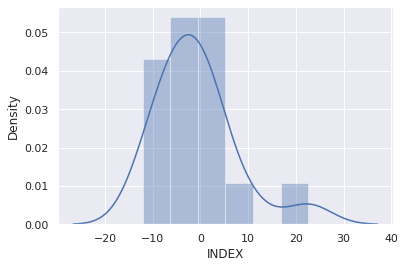

In [224]:
sns.distplot(y_test - y_predicted)